In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

Reading the dataset

In [2]:
df=pd.read_csv("USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
df.shape

(40949, 16)

Checking for NULL values

In [4]:
print("The null values are", df.isnull().sum())

The null values are video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64


Dropping duplicate values

In [5]:
df.drop_duplicates(subset="video_id",keep='first',inplace=True)
df.shape

(6351, 16)

Summary

In [6]:
pd.options.display.float_format = "{:,.0f}".format
df.describe()

,category_id,views,likes,dislikes,comment_count
count,"6,351","6,351","6,351","6,351","6,351"
mean,20,"758,210","34,494","1,427","4,502"
std,7,"1,928,993","116,244","12,079","21,460"
min,1,549,0,0,0
25%,17,"83,511","1,908",72,261
50%,24,"270,902","7,987",242,921
75%,25,"751,266","25,163",763,"2,845"
max,43,"48,431,654","3,880,071","629,120","733,373"


# 1. Generate a correlation heatmap for views, likes, dislikes and comment count

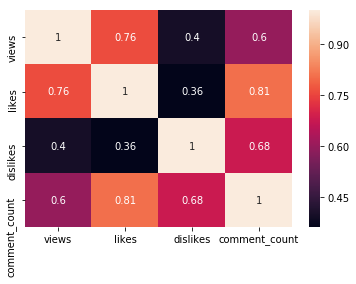

In [7]:
corr = df[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(corr, annot = True)
plt.show()

This shows that there is a strong positive correlation between number of likes and number of views

# Generate a general correlation heatmap

In [8]:
corr=df.corr()
corr.style.background_gradient(cmap="rainbow")

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1,-0.0960795,-0.129118,-0.0114617,-0.0555858,0.0413824,-0.0145474,-0.0123905
views,-0.0960795,1,0.761127,0.396135,0.599628,0.0138883,0.0145187,0.00591578
likes,-0.129118,0.761127,1,0.360274,0.806198,-0.0247054,-0.0190265,-0.0011007
dislikes,-0.0114617,0.396135,0.360274,1,0.679838,-0.00276963,-0.00757631,0.00128834
comment_count,-0.0555858,0.599628,0.806198,0.679838,1,-0.0266685,-0.0129847,-0.000775044
comments_disabled,0.0413824,0.0138883,-0.0247054,-0.00276963,-0.0266685,1,0.287525,-0.00276352
ratings_disabled,-0.0145474,0.0145187,-0.0190265,-0.00757631,-0.0129847,0.287525,1,-0.00139379
video_error_or_removed,-0.0123905,0.00591578,-0.0011007,0.00128834,-0.000775044,-0.00276352,-0.00139379,1


# 

In [9]:
df.category_id

0        22
1        24
2        23
3        24
4        24
5        28
6        24
7        28
8         1
9        25
10       17
11       24
12       10
13       25
14       15
15       28
16       23
17       27
18       28
19       27
20       27
21       28
22       27
23       26
24       23
25       24
26       28
27       26
28       25
29        1
         ..
40363    17
40364    24
40365    20
40366    20
40367    23
40475    22
40488    24
40540     1
40549    20
40550    20
40552    26
40553    24
40554    20
40563    23
40567    26
40749     1
40750    24
40751    20
40752    20
40753     1
40754    24
40755    10
40756    10
40757     1
40759    22
40760    26
40761    17
40762    24
40764    26
40766    24
Name: category_id, Length: 6351, dtype: int64

# Count the number videos of in each category

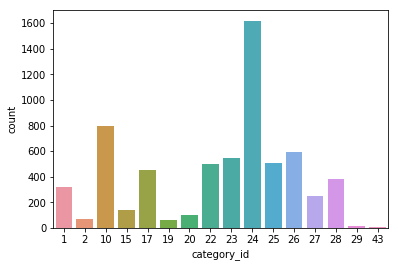

In [10]:
sns.countplot(x=df['category_id'])

# Top 10 most influential creators' channels

In [11]:
df.channel_title.value_counts()

ESPN                                      84
TheEllenShow                              74
The Tonight Show Starring Jimmy Fallon    72
Jimmy Kimmel Live                         70
Netflix                                   58
The Late Show with Stephen Colbert        58
NBA                                       55
CNN                                       52
Vox                                       47
The Late Late Show with James Corden      46
Refinery29                                40
BuzzFeedVideo                             40
Late Night with Seth Meyers               37
NFL                                       36
Saturday Night Live                       35
WWE                                       34
INSIDER                                   34
First We Feast                            31
Tasty                                     28
Washington Post                           27
SciShow                                   26
WIRED                                     26
Great Big 

Text(0.5, 0, 'Value count')

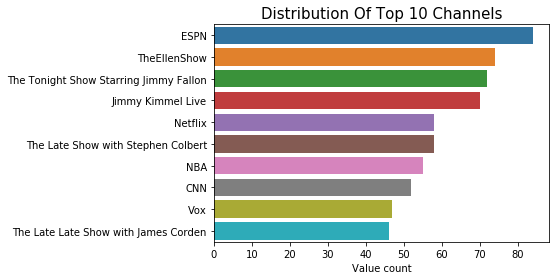

In [12]:
plt.title("Distribution Of Top 10 Channels",fontsize=15)
sns.barplot(x=df.channel_title.value_counts()[:10].values,y=df.channel_title.value_counts()[:10].index)
plt.xlabel('Value count')

# The videos posted at what time had the most likes?

In [13]:
df['month'] = pd.DatetimeIndex(df['publish_time']).month
df['hour'] = pd.DatetimeIndex(df['publish_time']).hour

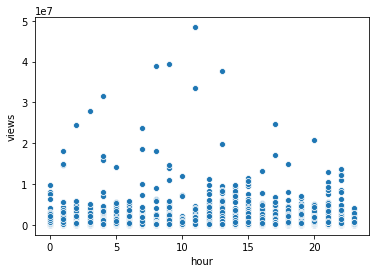

In [14]:
df['month'] = df['month'].astype('int')
df['hour'] = df['hour'].astype('int')
sns.scatterplot(x='hour', y='views', data=df)

The graph shows that videos published around 23:00 at US Central Standard Time (21:00 PST and 00:00 EST) received the most views.

# Correlation between views and likes

Text(0.5, 1.0, 'likes vs. views')

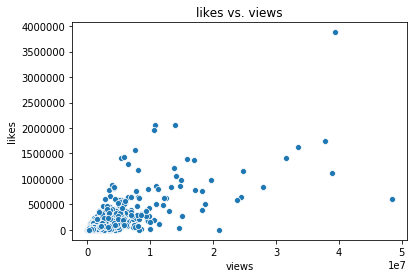

In [15]:
sns.scatterplot(x='views', y='likes', data=df)
plt.title('likes vs. views')

We see that views and likes are truly positively correlated: as one increases, the other increases too—mostly.

# publish year vs likes

In [16]:
df['month'] = pd.DatetimeIndex(df['publish_time']).month
df['year'] = pd.DatetimeIndex(df['publish_time']).year
df['dayofweek'] = pd.DatetimeIndex(df['publish_time']).dayofweek

df['month'] = df['month'].astype('int')
df['year'] = df['year'].astype('int')
df['dayofweek'] = df['dayofweek'].astype('int')

In [17]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m').dt.date

In [18]:
print(df['year'].value_counts(),df.groupby('year')['likes'].mean() )

2018    4129
2017    2152
2013      13
2015      10
2016       9
2011       8
2012       8
2014       7
2010       6
2009       5
2008       3
2006       1
Name: year, dtype: int64 year
2006      459
2008      198
2009      196
2010      237
2011      359
2012      255
2013       57
2014      343
2015      292
2016       33
2017   27,243
2018   38,854
Name: likes, dtype: float64


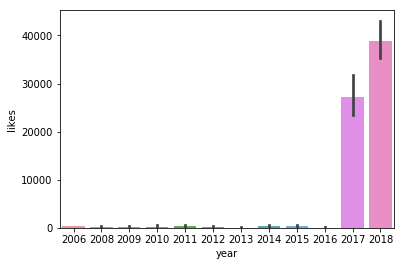

In [19]:
sns.barplot(x=df['year'], y=df['likes'])

# publish month vs likes

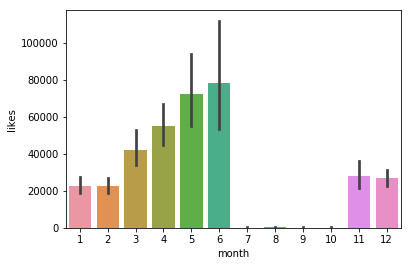

In [20]:
sns.barplot(x=df['month'],y=df['likes'])

# publish month vs likes

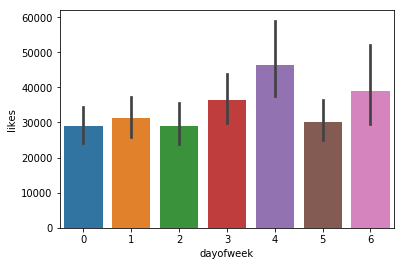

In [21]:
sns.barplot(x=df['dayofweek'],y=df['likes'])

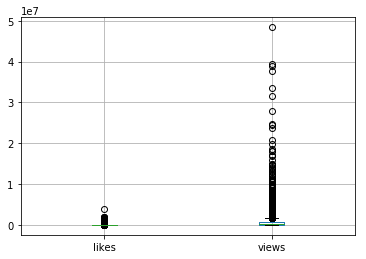

In [22]:
df.boxplot(['likes','views'])

# Boxplot of % of Likes on a Video By Category

In [23]:
df['likes_perc']=df['likes']/(df['dislikes']+df['likes'])*100

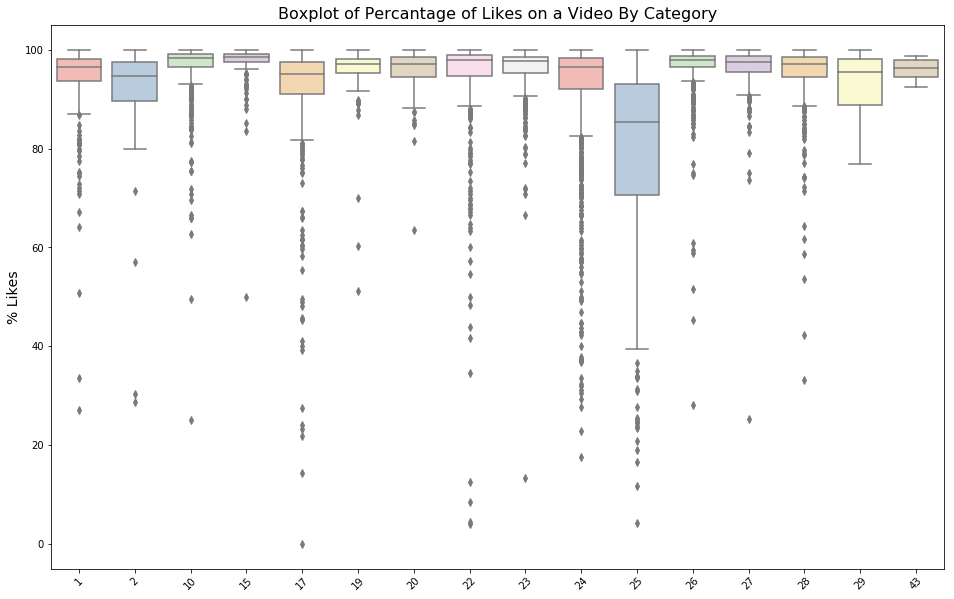

In [24]:
plt.figure(figsize = (16, 10))

sns.boxplot(x ='category_id', y ='likes_perc', data =df, palette ='Pastel1')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('% Likes', fontsize = 14)
plt.title('Boxplot of Percantage of Likes on a Video By Category', fontsize = 16)
plt.show()

Category No25 with a higher median and larger spread of likes.

# Percentage of Videos with Comments Disabled

In [25]:
comments_disabled = df['comments_disabled'].value_counts()

In [26]:
comments_disabled.values

array([6250,  101], dtype=int64)

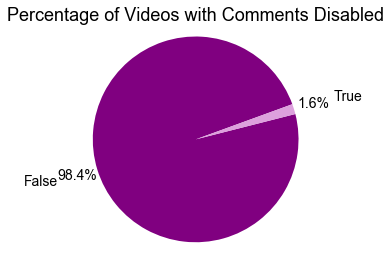

In [27]:
fig, ax = plt.subplots()
plt.rcParams['font.size']=14

plt.pie(comments_disabled, labels=comments_disabled.index, 
        autopct='%1.1f%%', startangle=20,
        pctdistance=1.2,labeldistance=1.4,
        colors = ['purple', 'plum'])
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plt.title("Percentage of Videos with Comments Disabled", fontsize=18)
plt.axis('equal')
plt.tight_layout()
plt.show()

1.5%of the videos are left with comments disabled while 98.4% of the vidoes are enabled with comments section.